In [ ]:
# -*- coding: utf-8 -*-
"""
This takes the data for one ppt in one session and organises it into
two arrays, one for left and one for right motor imagery data. 
All data not related to the MI trials is disregarded.
"""
import numpy as np
import glob
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.activations import sigmoid, relu
from tensorflow.keras.layers import Dense, Dropout

import scipy.io as spio
import matplotlib.pyplot as plt


In [ ]:
def figure(History, legend):
  ####################### PLOT TRAINING VS VALIDATION ######################
  ########## Accuracy ###########
  acc = History.history['acc']
  val_acc = History.history['val_acc']
  loss = History.history['loss']
  val_loss = History.history['val_loss']

  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(legend, loc='upper left')
  plt.grid()
  plt.show()

  ########## Loss ###########
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  try:
    loss_no_reg = History.history['categorical_crossentropy']
    val_loss_no_reg = History.history['val_categorical_crossentropy']
    plt.plot(loss_no_reg)
    plt.plot(val_loss_no_reg)
    plt.legend(legend + [legend[0]+' sin reg', legend[1]+' sin reg'], loc='upper left')
  except:
    plt.legend(legend, loc='upper left')

  plt.grid()
  plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving P1_post_test.mat to P1_post_test.mat
Saving P1_post_training.mat to P1_post_training.mat
Saving P1_pre_test.mat to P1_pre_test.mat


In [ ]:
# #change path
path_TRAIN = r'/content/P1_pre_training_caract_caract250mspca.mat' # use your path
path_test = r'/content/P1_pre_test_caract_caract250mspca.mat' # use your path
#path = r'/content'
#files_TRAIN = glob.glob(path + "/*training.mat")
#files_test = glob.glob(path + "/*test.mat")

mat_TRAIN = spio.loadmat(path_TRAIN, squeeze_me=True)
mat_test = spio.loadmat(path_test, squeeze_me=True)


10

In [ ]:
y_TRAIN_orig = np.clip( np.max(mat_TRAIN['vlabel'].reshape([-1,24]), axis=1) , 0 , 1)
x_TRAIN_orig = mat_TRAIN['mcaract'].reshape([-1,24,mat_TRAIN['mcaract'].shape[1]])
y_test_orig = np.clip( np.max(mat_test['vlabel'].reshape([-1,24]), axis=1) , 0 , 1)
x_test_orig = mat_test['mcaract'].reshape([-1,24,mat_TRAIN['mcaract'].shape[1]])


In [ ]:
y_TRAIN_orig

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int16)

In [ ]:
x_TRAIN_orig.shape

(80, 24, 10)

In [ ]:

max_value = np.max(x_TRAIN_orig, axis=(0,1))
min_value = np.min(x_TRAIN_orig, axis=(0,1))

x_TRAIN = (x_TRAIN_orig-min_value)/(max_value-min_value)
x_test = (x_test_orig-min_value)/(max_value-min_value)


In [ ]:
print(x_TRAIN.shape)
print(x_test.shape)
print(y_TRAIN_orig.shape)
print(y_test_orig.shape)

(80, 24, 10)
(80, 24, 10)
(80,)
(80,)


In [ ]:
 
model = tf.keras.models.Sequential([
  #tf.keras.layers.LSTM(32, return_sequences=True, input_shape=(x_TRAIN.shape[1],x_TRAIN.shape[2])),
  tf.keras.layers.LSTM(32, input_shape=(x_TRAIN.shape[1],x_TRAIN.shape[2])),
  #tf.keras.layers.LSTM(32),
  tf.keras.layers.Dense(1, activation = sigmoid),
])
model.summary()

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam(lr=1e-6)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["acc"])
history = model.fit(x_TRAIN, y_TRAIN_orig, epochs=100, callbacks=[lr_schedule])

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 32)                5504      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 0.6919 - acc: 0.5234
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6973 - acc: 0.4766
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6915 - acc: 0.5273
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6914 - acc: 0.5273
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6971 - acc: 0.4805
Epoch 6/100
3/3 [==============================] - 0s

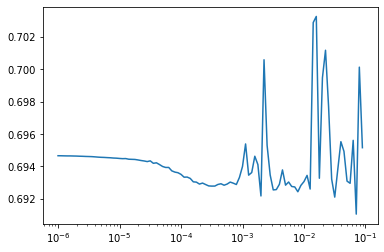

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-8, 1e-4, 0, 30])


In [ ]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.LSTM(32, return_sequences=True, input_shape=(x_TRAIN.shape[1],x_TRAIN.shape[2])),
  #tf.keras.layers.LSTM(32),
  tf.keras.layers.LSTM(32, input_shape=(x_TRAIN.shape[1],x_TRAIN.shape[2]) ),
  tf.keras.layers.Dense(1, activation = sigmoid),
])

model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 32)                5504      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=4e-4)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["acc"])

history = model.fit(x_TRAIN, y_TRAIN_orig, validation_data = (x_test, y_test_orig), epochs=200)


Epoch 1/200
3/3 [==============================] - 2s 200ms/step - loss: 0.6913 - acc: 0.5578 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6899 - acc: 0.5398 - val_loss: 0.6921 - val_acc: 0.5625
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6903 - acc: 0.5758 - val_loss: 0.6924 - val_acc: 0.5375
Epoch 4/200
3/3 [==============================] - 0s 21ms/step - loss: 0.6906 - acc: 0.5039 - val_loss: 0.6925 - val_acc: 0.5250
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6904 - acc: 0.5156 - val_loss: 0.6926 - val_acc: 0.5250
Epoch 6/200
3/3 [==============================] - 0s 21ms/step - loss: 0.6906 - acc: 0.5078 - val_loss: 0.6926 - val_acc: 0.5250
Epoch 7/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6896 - acc: 0.5195 - val_loss: 0.6925 - val_acc: 0.5250
Epoch 8/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6894 - acc: 0.5

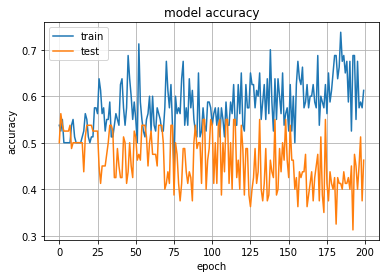

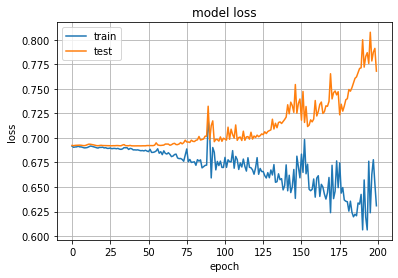

In [ ]:
figure(history, ['train', 'test'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


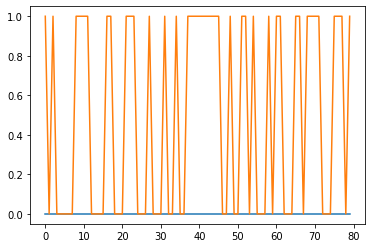

In [ ]:
plt.plot(model.predict_classes(x_test))
plt.plot(y_test_orig)
